In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

# Dataset

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv', usecols=['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg'])

In [3]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


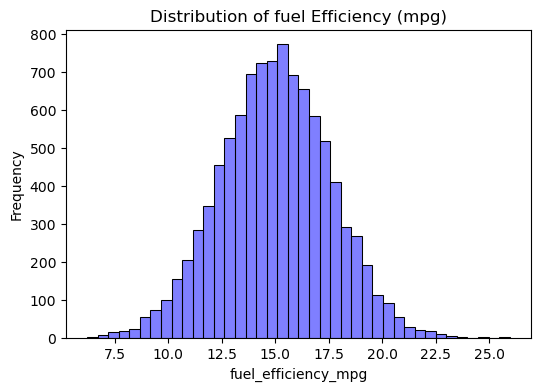

In [4]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Distribution of fuel Efficiency (mpg)')

plt.show()

# Question 1. 
Missing Values

In [5]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

# Question 2
Median for horse power


In [6]:
print(f'Median horpower: {df.horsepower.median()}')

Median horpower: 149.0


# Prepare and split dataset

In [7]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [8]:
print(len(df_train), len(df_val), len(df_test))

5824 1940 1940


In [9]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [10]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Question 3

In [11]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [12]:
def prepare_X(df, fill_value):
    df_num = df[base]
    df_num = df_num.fillna(fill_value)
    X = df_num.values
    return X

In [13]:
## fill missing values with 0

X_train = prepare_X(df_train, 0)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

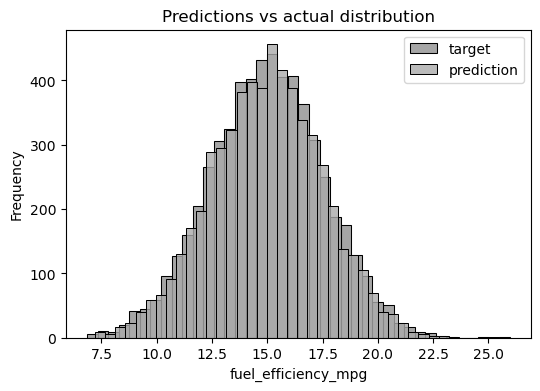

In [14]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.4, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Predictions vs actual distribution')

plt.show()

In [15]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [16]:
round(rmse(y_train, y_pred),2)

np.float64(0.52)

In [17]:
X_val = prepare_X(df_val,0)
y_pred = w_0 + X_val.dot(w)

In [18]:
round(rmse(y_val, y_pred),2)

np.float64(0.52)

In [20]:
## fill missing values with mean

horsepower_mean = df_train.horsepower.mean()

X_train = prepare_X(df_train, horsepower_mean)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [21]:
X_val = prepare_X(df_val,horsepower_mean)
y_pred = w_0 + X_val.dot(w)

In [22]:
round(rmse(y_val, y_pred),2)

np.float64(0.46)

# Q4

In [23]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [26]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 28.827365473735238 0.5173782638837691
1e-06 28.826914393081207 0.5173782142041874
0.0001 28.78232717117213 0.5173733251306785
0.001 28.383227517706356 0.5173314578317969
0.01 24.926838419828847 0.517111552577407
0.1 11.239661084673418 0.5187525130701819
1 1.731597941163022 0.5222348802092905
5 0.36380750205293755 0.5228916092823562
10 0.18306246621814357 0.52298129796366


In [32]:
scores = []

for seed in range(0,10):
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
  
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    scores.append(score)

    print(seed, w0, score)

0 8.906800776512396 2.6513843984566443
1 17.05554727754247 2.653261921564345
2 -2.9224484855045354 2.6498015823971675
3 6.139554244433384 2.653673674155363
4 15.077876487427424 2.6490274521098764
5 9.631728079692678 2.6535697501955195
6 31.713745824670767 2.652975777687737
7 10.267426032287709 2.6526127300341322
8 23.824516797415516 2.651576900514041
9 15.83249135996499 2.6520977021988283


In [33]:
round(np.std(scores),3)

np.float64(0.001)

# Q6

In [38]:
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_full_train = pd.concat([df_train, df_val])
df_test = df.iloc[idx[n_train+n_val:]]

y_full_train = df_full_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [39]:
X_train = prepare_X(df_full_train, 0)
w0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
    
print(r, w0, score)

10 27.203878523564793 0.5244085654549188
